# THE SPARKS FOUNDATION
### GRADUATE ROTATIONAL INTERNSHIP PROGRAM

# -----------------------------------------------------------------------------------------------------------

**ADHISHWAR NARAYAN TIWARI**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN**

# --------------------------------------------------------------------------------------------------------------

# **Predicting Marks of Student based on Study Hours**

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [1]:
# Importing all libraries necessary
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

#### IMPORTING DATA-SET

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("DATA IMPORTED")
data.head()

DATA IMPORTED


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### ANALYSING THE DATASET

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# for checking null values in Dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


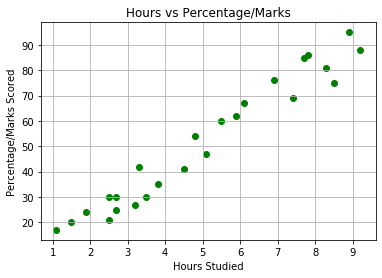

In [6]:
# Plotting scatter graph for scores
plt.scatter(x='Hours',y='Scores',data=data, c='green')
plt.title('Hours vs Percentage/Marks')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage/Marks Scored')
plt.grid()
plt.show()

**From the graph above, we can conclude that there is a positive linear relation between the number of hours studied and percentage of score.**

[]

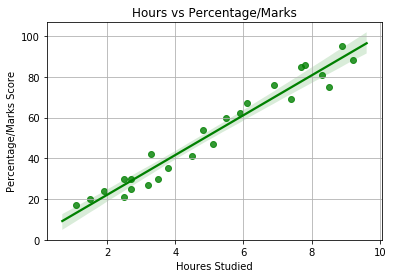

In [7]:
sns.regplot(x='Hours',y='Scores',data=data,color='green')
plt.title("Hours vs Percentage/Marks")
plt.xlabel("Houres Studied")
plt.ylabel("Percentage/Marks Score")
plt.grid()
plt.plot()

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

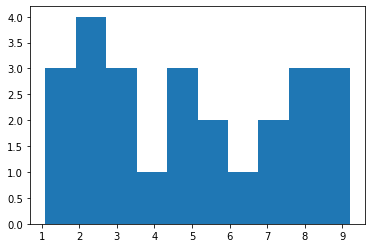

In [8]:
plt.hist(data['Hours'])

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

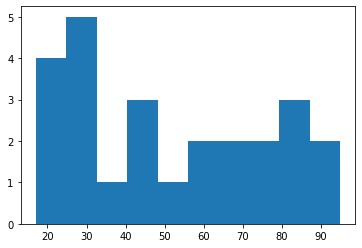

In [9]:
plt.hist(data['Scores'])

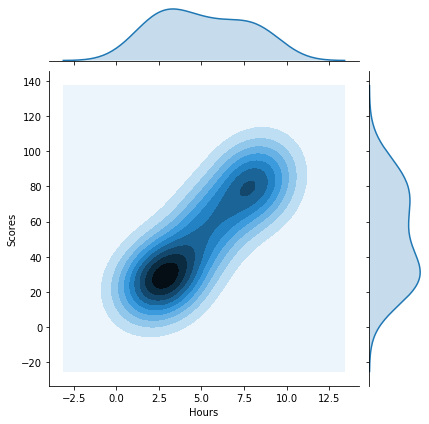

In [10]:
sns.jointplot(x='Hours',y='Scores',data=data,kind='kde')

### **Preparing the data**


In [11]:
# Reshaping both the data
x = data.iloc[:, :-1].values  
print(x)
y = data.iloc[:, 1].values  
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now, you have two arrays: the input x and output y. Here 'x' is reshaped because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary.

#### TRAIN-TEST SPLIT

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

### **TRAINING THE MODEL**

In [15]:
from sklearn.linear_model import LinearRegression  
lrmodel = LinearRegression(normalize=True)  
lrmodel.fit(x_train, y_train) 

print("LINEAR REGRESSION MODEL TRAINED")

LINEAR REGRESSION MODEL TRAINED


In [16]:
# Plotting the regression line
line = lrmodel.coef_*x+lrmodel.intercept_


# obtaining the intercept and coefficient of liner model
print("The intercept is : ",lrmodel.intercept_)
print(" The cofficient is :",str(lrmodel.coef_)[1:-1])

The intercept is :  2.018160041434662
 The cofficient is : 9.91065648


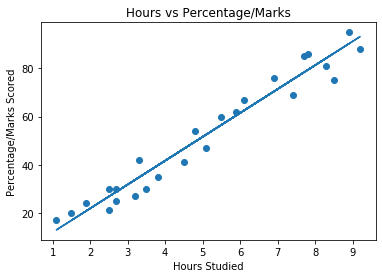

In [17]:
# Plotting for the test data
plt.scatter(x, y)
plt.title('Hours vs Percentage/Marks')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage/Marks Scored')
plt.plot(x, line);
plt.show()

### **PREDICTING/RUNNING THE TEST DATA**

In [18]:
print(x_test) # Testing data - In Hours
y_pred = lrmodel.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### TESTING NEW USER GIVEN DATA

In [20]:
# You can also test with your own data
hours = [[9.25]]
own_pred = lrmodel.predict(hours)
print("No of Hours = ",str(hours)[2:-2])
print("Predicted Score = {}".format(own_pred[0]))

No of Hours =  9.25
Predicted Score = 93.69173248737539


### **EVALUATING THE MODEL**

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error :",metrics.mean_squared_error(y_test,y_pred))
print("Root mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error : 21.598769307217456
Root mean Squared Error: 4.647447612100373
